In [1]:
import torch
import torchvision
import torchvision.transforms as T
import matplotlib.pyplot as plt
from groups.discrete_so2 import DiscreteSO2


In [2]:
def plot_img(img: torch.tensor):
  plt.imshow(T.ToPILImage()(img))


In [3]:
device = "cpu"


In [4]:
group = DiscreteSO2(order=4, device=device)


In [5]:
mnist_train = torchvision.datasets.MNIST(
    "./datasets/",
    train=True,
    transform=T.ToTensor(),
    download=True)


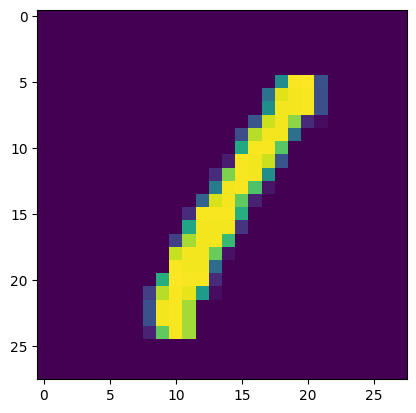

In [6]:
(img, label) = mnist_train[3]
plot_img(img)


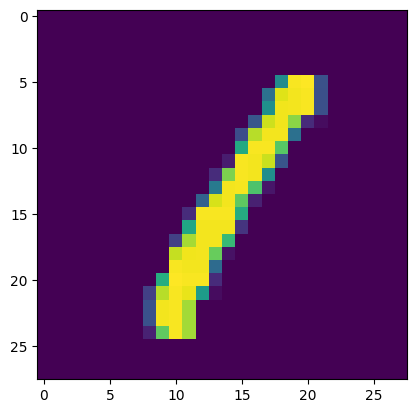

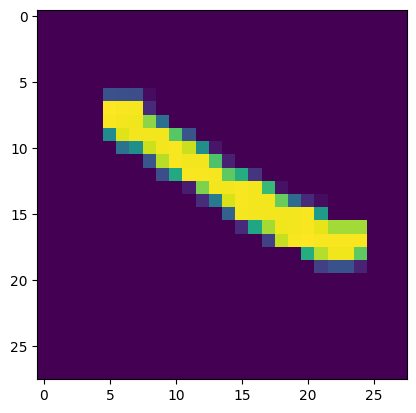

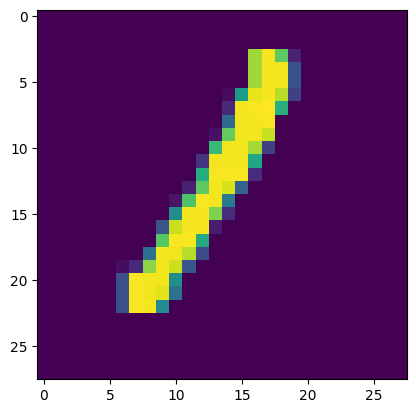

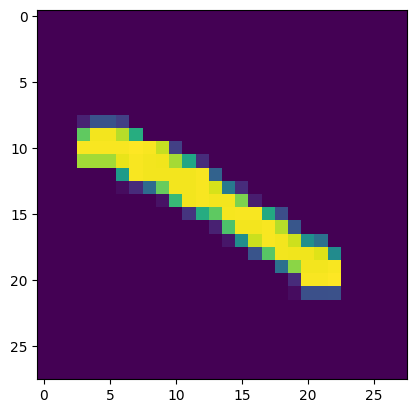

In [7]:
rotated_img = group.left_action_on_r_n_signal(group.elements(), img)

plot_img(img)
for i in range(group.order):
  plot_img(rotated_img[i, :, :, :])
  plt.show()


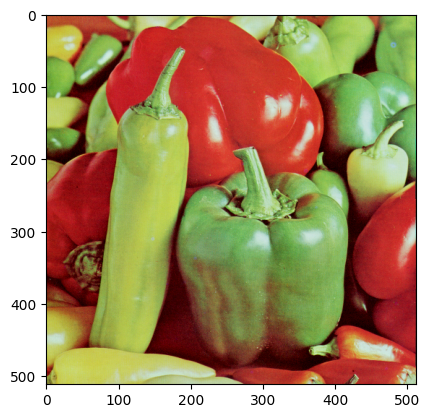

In [8]:
from PIL import Image
import os
img = Image.open(os.path.join("paprika.tiff"))
img_tensor = T.ToTensor()(img)

plot_img(img_tensor)


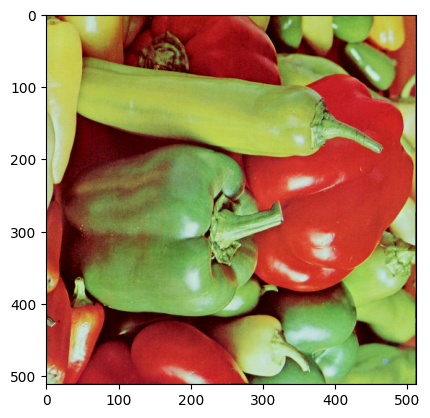

In [9]:
e, g1, g2, g3 = group.elements()
g = group.product(g1, g2)

plot_img(group.left_action_on_r_n_signal(g.view(1, 1), img_tensor).squeeze(0))
